# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload both the PDF and the ipynb file on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
import keras
from scipy import signal

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [60]:
def create_padding(input_image, d):

    #TODO
    output_image = np.pad(input_image, pad_width=d, mode='constant', constant_values=0)


    return output_image
    

**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [61]:
def convolution(input_image, kernel):

    #TODO
    # Convert input to NumPy array (if not already)
    input_image = np.array(input_image)

    # If image has 3 channels (color), convert to grayscale by averaging channels
    if input_image.ndim == 3:
        input_image = input_image.mean(axis=2)

    # Convert to float and normalize if max pixel > 1 (assuming 8-bit input)
    if input_image.max() > 1:
        input_image = input_image.astype(np.float32) / 255.0
    else:
        input_image = input_image.astype(np.float32)

    kernel = np.array(kernel, dtype=np.float32)
    n, m = input_image.shape
    k, _ = kernel.shape

    padded = create_padding(input_image, k // 2)
    output_image = np.zeros((n, m), dtype=np.float32)

    for i in range(n):
        for j in range(m):
            region = padded[i:i+k, j:j+k]
            output_image[i, j] = np.sum(region * kernel)
    return output_image

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [62]:
def pooling(input_image, p, pooling_type = "max_pooling"):
    n, m = input_image.shape
    output_height = n - p + 1
    output_width = m - p + 1
    output_image = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            window = input_image[i:i+p, j:j+p]
            if pooling_type == "max_pooling":
                output_image[i, j] = np.max(window)
            elif pooling_type == "avg_pooling":
                output_image[i, j] = np.mean(window)
            else:
                print("Error: Invalid pooling type")
                return None

    return(output_image)
    

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

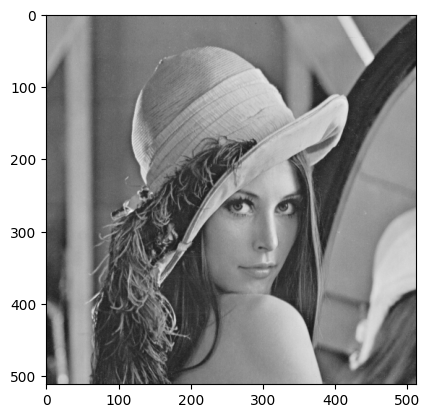

In [63]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution and pooling separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

The following outputs are expected:
1. lena kernel 1 convolution and then max pooled, set your output to the variable lena_kernel_1_maxpool.
2. lena kernel 2 convolution and then average pooled, set your output to the variable lena_kernel_2_avgpool.
3. lena kernel 3 convolution and then max pooled, set your output to the variable lena_kernel_3_maxpool.
4. lena kernel 4 convolution and then average pooled, set your output to the variable lena_kernel_4_avgpool.

In [ ]:
#TODO
#Write code to use your convolution and pooling methods.

kernel_1 = np.array([[+1, 0, -1],
                     [+1, 0, -1],
                     [+1, 0, -1]])

kernel_2 = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [+1, +1, +1]])

kernel_3 = np.array([[-1, 0, +1],
                     [-2, 0, +2],
                     [-1, 0, +1]])

kernel_4 = np.array([[+1, +2, +1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

 

conv_1 = convolution(lena, kernel_1)
conv_2 = convolution(lena, kernel_2)
conv_3 = convolution(lena, kernel_3)
conv_4 = convolution(lena, kernel_4)
conv_5 = convolution(lena, kernel_5)

lena_kernel_1_maxpool = pooling(conv_1, p=2, pooling_type="max_pooling")
lena_kernel_2_avgpool = pooling(conv_2, p=2, pooling_type="avg_pooling")
lena_kernel_3_maxpool = pooling(conv_3, p=2, pooling_type="max_pooling")
lena_kernel_4_avgpool = pooling(conv_4, p=2, pooling_type="avg_pooling")
lena_kernel_5_maxpool = pooling(conv_5, p=2, pooling_type="max_pooling")


<font color='blue'>Explain what each of the above kernels (including your choice) will do to the image.</font>

In [65]:
#Write your answers as a string (max 2 sentences per kernel)

Ans_Kernel_1 = "This kernel detects vertical edges by subtracting pixel intensities between the left and right sides of the image. It is used as a vertical edge detector."
Ans_Kernel_2 = "This kernel detects horizontal edges by comparing the pixel values between the top and bottom of the image. It is used as a horizontal edge detector."
Ans_Kernel_3 = "This is the Sobel vertical edge detector, which emphasizes vertical edges with more weight on central rows."
Ans_Kernel_4 = "This is the Sobel horizontal edge detector, highlighting horizontal edges with greater emphasis on central pixel differences to enhance edge clarity."
Ans_Kernel_5 = "A Laplacian kernel (e.g., [[0, 1, 0], [1, -4, 1], [0, 1, 0]]) detects edges by calculating the second-order derivatives, enhancing regions of rapid intensity change regardless of direction."


Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

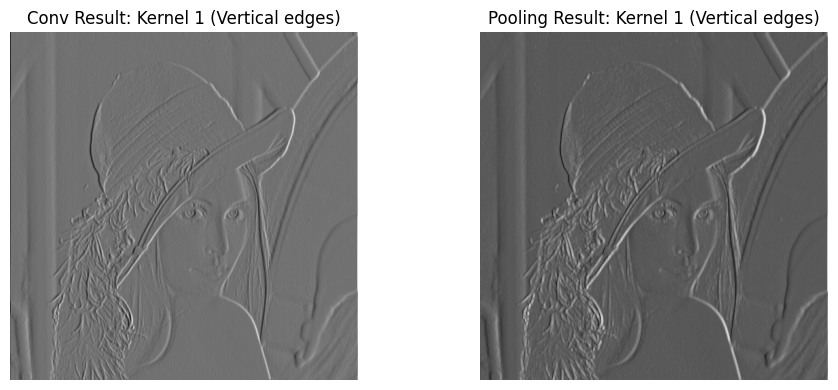

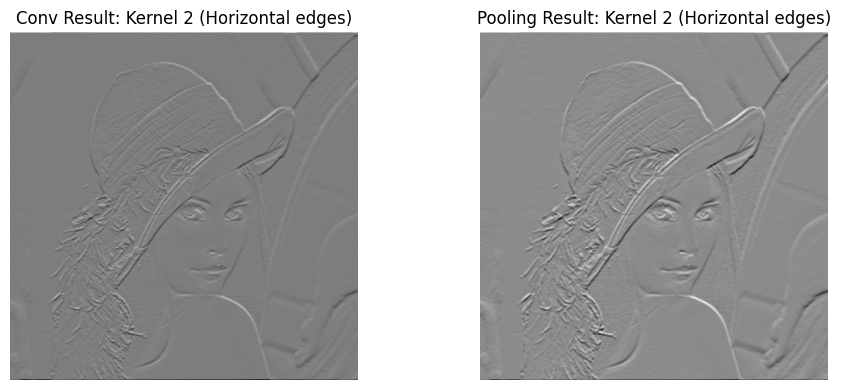

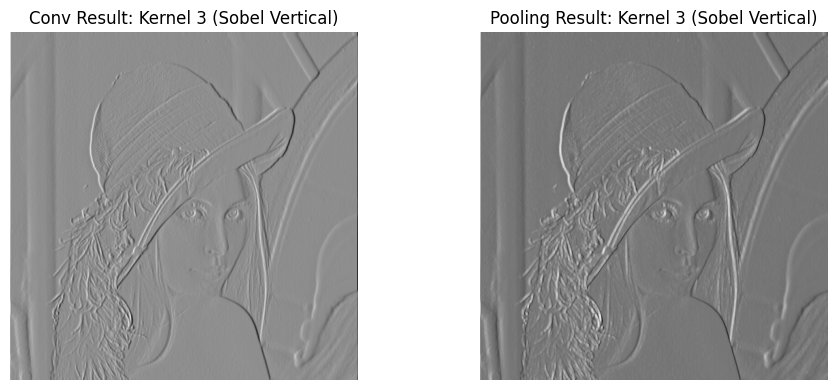

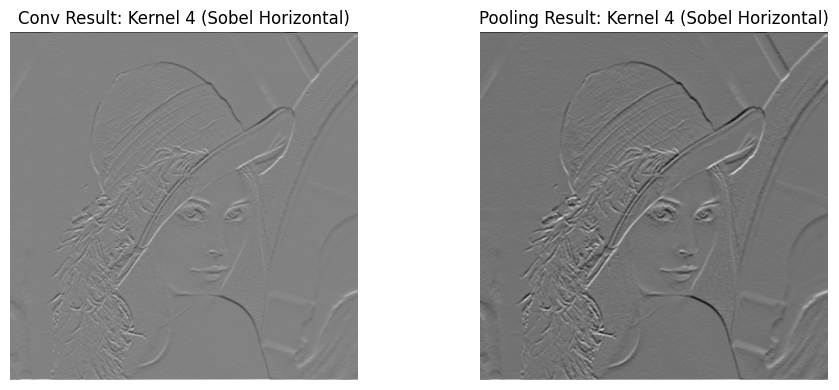

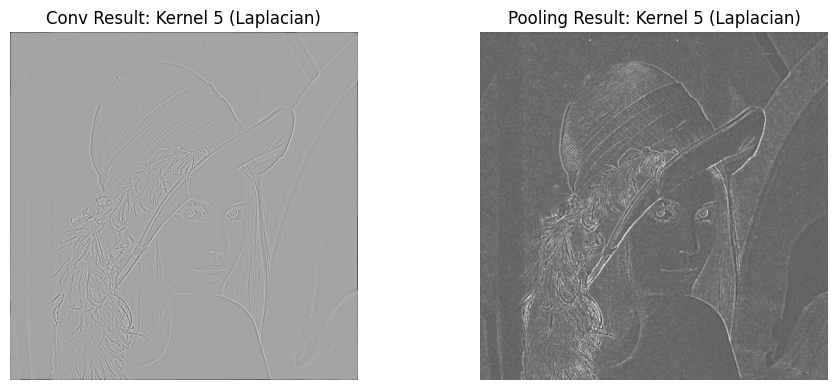

In [66]:
kernels = [kernel_1, kernel_2, kernel_3, kernel_4, kernel_5]
conv_results = [conv_1, conv_2, conv_3, conv_4, conv_5]
pool_results = [lena_kernel_1_maxpool, lena_kernel_2_avgpool, lena_kernel_3_maxpool, lena_kernel_4_avgpool, lena_kernel_5_maxpool]
titles = [
    "Kernel 1 (Vertical edges)",
    "Kernel 2 (Horizontal edges)",
    "Kernel 3 (Sobel Vertical)",
    "Kernel 4 (Sobel Horizontal)",
    "Kernel 5 (Laplacian)"
]

for i in range(5):
    plt.figure(figsize=(10,4))

    # Convolution subplot
    plt.subplot(1,2,1)
    plt.imshow(conv_results[i], cmap='gray')
    plt.title(f"Conv Result: {titles[i]}")
    plt.axis('off')

    # Pooling subplot
    plt.subplot(1,2,2)
    plt.imshow(pool_results[i], cmap='gray')
    plt.title(f"Pooling Result: {titles[i]}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to **build the structure of your model appropriately using keras**. I have provided only the code to download the cifar10 dataset. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

**Final expected outcome:** For the best CNN model architecture and parameters you find, **your model is required to be able to provide accurate predictions**. The **accuracy rate will determine your score**. For this **implement a predict function** - instructions given below.

Hint: To improve your model you may use the following techniques. 
1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [67]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [68]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load & normalize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

subset_size = 20000
x_train = x_train[:subset_size]
y_train = y_train[:subset_size]

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train
model.fit(x_train, y_train_cat,
          epochs=12,
          batch_size=64,
          validation_split=0.2,
          callbacks=[early_stop],
          verbose=2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Save model
model.save("best_cifar10_model.h5")


Epoch 1/12
250/250 - 13s - 52ms/step - accuracy: 0.3422 - loss: 1.7974 - val_accuracy: 0.4512 - val_loss: 1.5026
Epoch 2/12
250/250 - 10s - 38ms/step - accuracy: 0.4671 - loss: 1.4646 - val_accuracy: 0.5385 - val_loss: 1.2884
Epoch 3/12
250/250 - 9s - 36ms/step - accuracy: 0.5483 - loss: 1.2595 - val_accuracy: 0.5548 - val_loss: 1.2371
Epoch 4/12
250/250 - 9s - 35ms/step - accuracy: 0.6054 - loss: 1.1070 - val_accuracy: 0.6068 - val_loss: 1.0974
Epoch 5/12
250/250 - 9s - 36ms/step - accuracy: 0.6578 - loss: 0.9675 - val_accuracy: 0.6390 - val_loss: 1.0317
Epoch 6/12
250/250 - 9s - 34ms/step - accuracy: 0.7021 - loss: 0.8496 - val_accuracy: 0.6545 - val_loss: 1.0060
Epoch 7/12
250/250 - 9s - 35ms/step - accuracy: 0.7376 - loss: 0.7413 - val_accuracy: 0.6555 - val_loss: 1.0105
Epoch 8/12
250/250 - 9s - 36ms/step - accuracy: 0.7762 - loss: 0.6362 - val_accuracy: 0.6535 - val_loss: 1.0569


Test accuracy: 0.6587


In [69]:
#In this cell define the function predict, which will predict the class of test_images using your best CNN-model.
#The output should be a python list of strings of classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
#Your work will be mainly evaluated based on this.
#The grader will test it against input images and your score will be determined based on the number of correct predictions. 
#Expect the input to be a torch tensor of shape [64, 3, 32, 32]

def predict(test_images):

    #TODO
    np_images = test_images.numpy()  
    np_images = np.transpose(np_images, (0, 2, 3, 1))
    
    np_images = np_images.astype('float32') / 255.0
    
    preds = model.predict(np_images)
    
    pred_indices = np.argmax(preds, axis=1)
    
    # Map indices to class names
    predictions = [class_names[idx] for idx in pred_indices]
    
    return predictions

In [70]:
# import torch
# import numpy as np

# # Load CIFAR-10 test set (again if not already)
# (_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# # Convert test images to PyTorch tensor format to simulate grader's input
# x_test_torch = torch.tensor(np.transpose(x_test, (0, 3, 1, 2)))  # shape: [10000, 3, 32, 32]

# # Use only a batch of 64 for quick evaluation
# x_batch = x_test_torch[:64]
# y_true = y_test[:64].flatten()

# # Run predictions using the provided function
# predicted_classes = predict(x_batch)

# # Convert string predictions back to class indices
# predicted_indices = [class_names.index(label) for label in predicted_classes]

# # Compute accuracy
# correct = sum([pred == true for pred, true in zip(predicted_indices, y_true)])
# accuracy = correct / len(y_true)

# print(f"Accuracy on batch of 64 test images: {accuracy * 100:.2f}%")
